In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import scipy.stats as stats

In [2]:
df = pd.read_csv("cancer_reg.csv", encoding = "ISO-8859-1")

In [3]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [4]:
df.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite            

In [5]:
df = df.drop("Geography",axis=1)
df = df.drop("binnedInc",axis=1)

In [6]:
df.shape

(3047, 32)

In [7]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  AvgHouseholdSize         3047 non-null   float64
 12  PercentMarried           3047 non-null   float64
 13  PctNoHS18_24             3047 non-null   float64
 14  PctHS18_24              

In [9]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRat

In [10]:
df.drop('PctSomeCol18_24', axis=1, inplace=True)

In [11]:
df.shape

(3047, 31)

In [12]:
df['PctEmployed16_Over'].fillna(int(df['PctEmployed16_Over'].mean()), inplace=True)

In [13]:
df.isnull().sum()

avgAnnCount                  0
avgDeathsPerYear             0
TARGET_deathRate             0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
studyPerCap                  0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over           0
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    609
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarriedHouseholds         0
BirthRate                    0
dtype: int64

In [14]:
df['PctPrivateCoverageAlone'].fillna(int(df['PctPrivateCoverageAlone'].mean()), inplace=True)

In [15]:
df.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [16]:

from scipy import stats
data=df['avgAnnCount'];
data

0       1397.000000
1        173.000000
2        102.000000
3        427.000000
4         57.000000
           ...     
3042    1962.667684
3043    1962.667684
3044    1962.667684
3045    1962.667684
3046    1962.667684
Name: avgAnnCount, Length: 3047, dtype: float64

In [17]:
#one-sample t-test
pvalue=stats.ttest_1samp(data,57)

In [18]:
pvalue

Ttest_1sampResult(statistic=21.409365866541442, pvalue=7.624012453889846e-95)

In [19]:
stats.ttest_1samp(data,1962.667684)

Ttest_1sampResult(statistic=-52.8602027421114, pvalue=0.0)

In [20]:
#Null hypothesis is accepted if p-value > significance statistics otherwise it is rejected
#Hence rejected

In [21]:
#Correlation
df.corr()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,0.939408,-0.143532,0.073553,0.269145,0.926894,-0.135694,0.082071,-0.024098,-0.124969,...,0.166630,0.202349,-0.173548,-0.093699,-0.136501,0.031376,0.435071,0.209184,-0.106221,-0.034508
avgDeathsPerYear,0.939408,1.000000,-0.090715,0.062690,0.223207,0.977634,-0.066918,0.063488,-0.024599,-0.148487,...,0.112192,0.160124,-0.131687,-0.027338,-0.187159,0.084607,0.443074,0.215149,-0.160266,-0.074420
TARGET_deathRate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,0.004375,-0.021929,...,-0.325730,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407
incidenceRate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.018089,-0.014733,...,0.099073,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181
medIncome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,-0.013288,-0.091663,...,0.706707,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195
popEst2015,0.926894,0.977634,-0.120073,0.026912,0.235523,1.000000,-0.065299,0.055722,-0.025219,-0.176608,...,0.121366,0.158650,-0.160066,-0.041469,-0.190095,0.073044,0.464168,0.241468,-0.127979,-0.057740
povertyPercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.029280,-0.214001,...,-0.682434,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283
studyPerCap,0.082071,0.063488,-0.022285,0.077283,0.044003,0.055722,-0.055652,1.000000,-0.026030,-0.036647,...,0.068837,0.100063,-0.051497,-0.055512,0.023291,-0.019761,0.062543,-0.015247,-0.051736,0.010676
MedianAge,-0.024098,-0.024599,0.004375,0.018089,-0.013288,-0.025219,-0.029280,-0.026030,1.000000,0.129119,...,-0.021604,-0.036926,0.049060,-0.003298,0.035009,-0.017173,-0.038424,-0.030277,0.014504,-0.008276
MedianAgeMale,-0.124969,-0.148487,-0.021929,-0.014733,-0.091663,-0.176608,-0.214001,-0.036647,0.129119,1.000000,...,-0.147864,-0.208664,0.398967,0.002479,0.398044,-0.242748,-0.238322,-0.266655,0.222278,-0.104105


<AxesSubplot:>

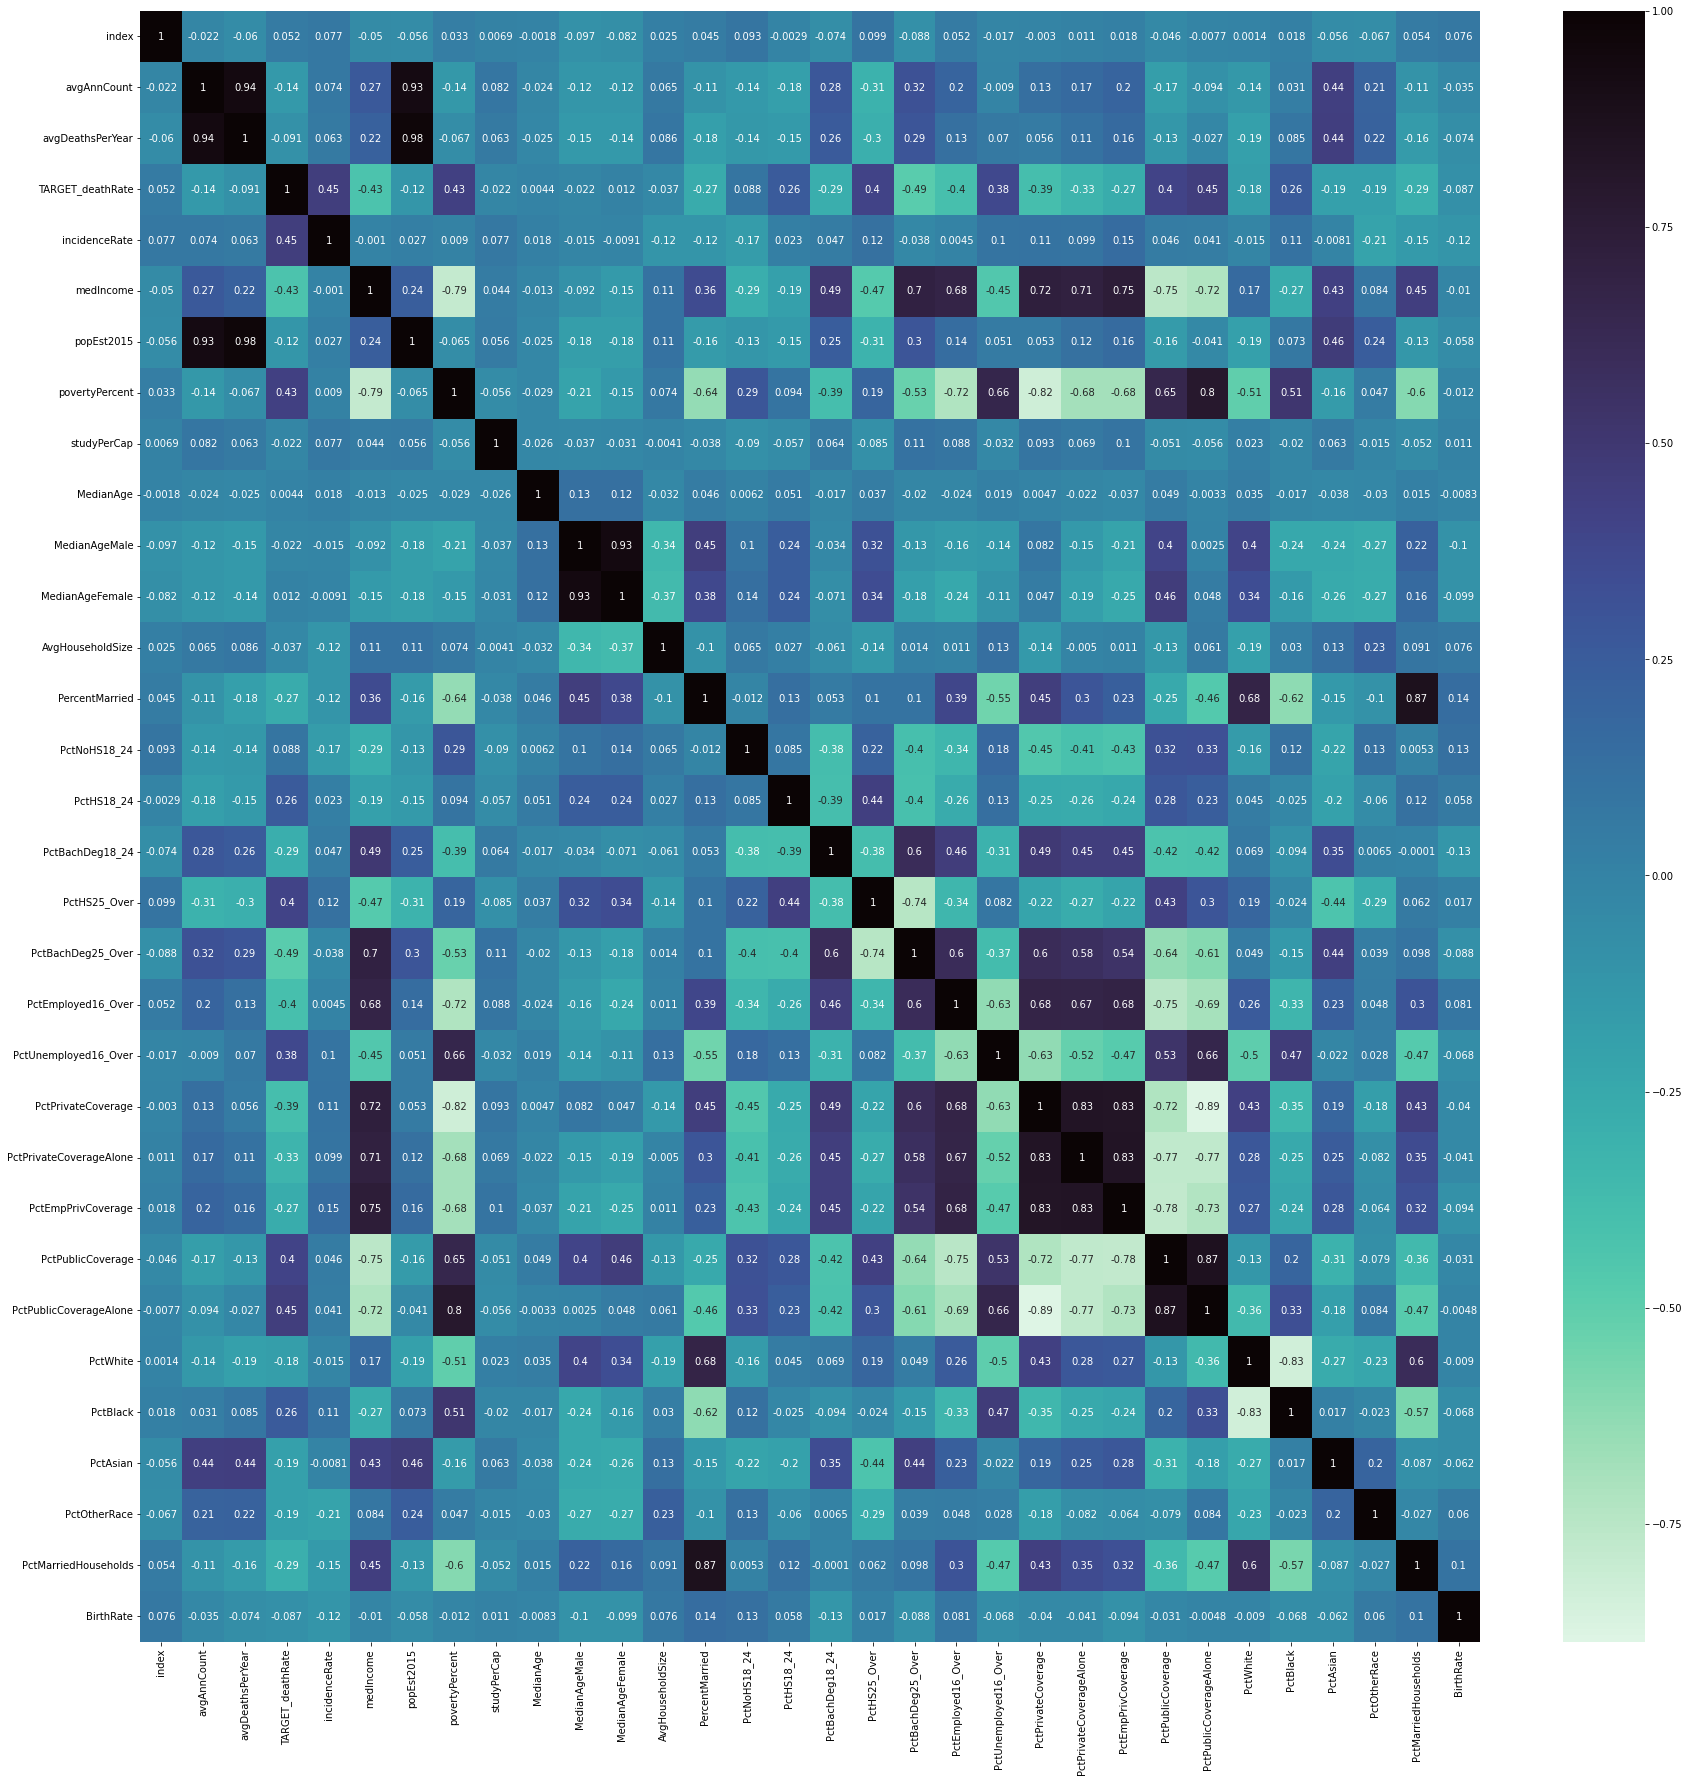

In [117]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='mako_r')

In [23]:
Age=df["MedianAge"]

In [24]:
Age

0       39.3
1       33.0
2       45.0
3       42.8
4       48.3
        ... 
3042    44.2
3043    30.4
3044    30.9
3045    39.0
3046    26.2
Name: MedianAge, Length: 3047, dtype: float64

In [25]:
Age_mean=np.mean(Age)
print(Age_mean)

45.27233344273055


In [26]:
df1=df.groupby(['MedianAgeMale'])['MedianAgeFemale'].sum().reset_index()

In [27]:
df1

,MedianAgeMale,MedianAgeFemale
0,22.4,22.3
1,22.8,25.2
2,23.0,24.5
3,23.7,40.2
4,23.8,22.3
...,...,...
293,56.5,56.7
294,58.5,55.0
295,58.6,55.0
296,60.2,58.2


In [28]:
df2=df1.head()
print(df2)

   MedianAgeMale  MedianAgeFemale
0           22.4             22.3
1           22.8             25.2
2           23.0             24.5
3           23.7             40.2
4           23.8             22.3


<AxesSubplot:xlabel='MedianAgeMale'>

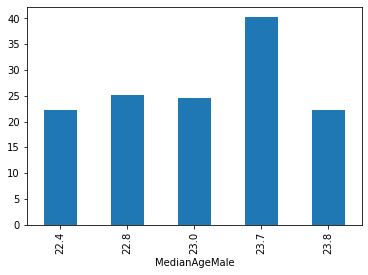

In [29]:
df2.groupby(['MedianAgeMale'])['MedianAgeFemale'].sum().plot.bar()

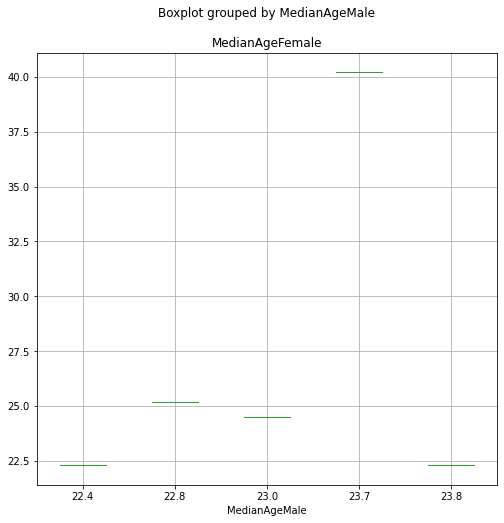

In [30]:
df2.boxplot(column="MedianAgeFemale",        
                 by= "MedianAgeMale",         
                 figsize= (8,8))
plt.show()

In [31]:
df3=df.groupby(['avgAnnCount'])['TARGET_deathRate'].sum().reset_index()

In [32]:
df3

,avgAnnCount,TARGET_deathRate
0,6.0,214.4
1,7.0,611.0
2,8.0,816.3
3,9.0,1245.6
4,10.0,1071.4
...,...,...
924,13294.0,157.1
925,14477.0,161.4
926,15470.0,146.6
927,24965.0,177.0


In [33]:
df4=df3.head()
print(df4)

   avgAnnCount  TARGET_deathRate
0          6.0             214.4
1          7.0             611.0
2          8.0             816.3
3          9.0            1245.6
4         10.0            1071.4


<AxesSubplot:xlabel='avgAnnCount'>

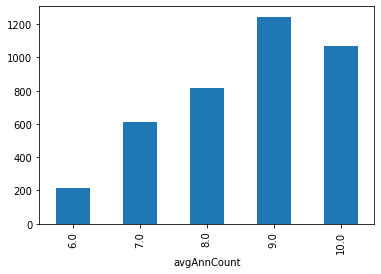

In [34]:
df4.groupby(['avgAnnCount'])['TARGET_deathRate'].sum().plot.bar()

C:\Users\Lenovo\anaconda3\envs\firstEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


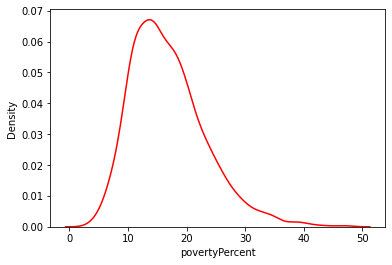

In [35]:
sns.distplot(df.povertyPercent, hist=False,kde=True,color='r')
plt.show()

C:\Users\Lenovo\anaconda3\envs\firstEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


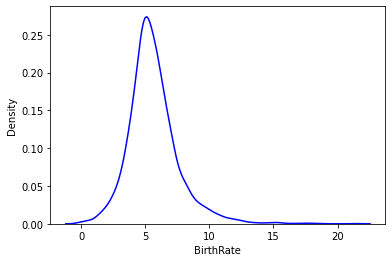

In [36]:
sns.distplot(df.BirthRate, hist=False,kde=True,color='blue')
plt.show()

C:\Users\Lenovo\anaconda3\envs\firstEnv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


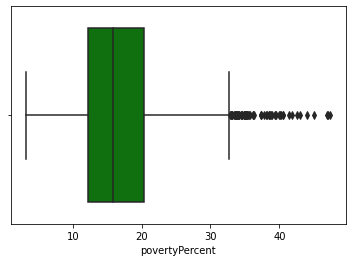

In [37]:
sns.boxplot(df.povertyPercent,color='g')
plt.show()

C:\Users\Lenovo\anaconda3\envs\firstEnv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


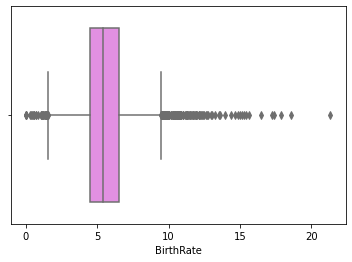

In [38]:
sns.boxplot(df.BirthRate ,color='violet')
plt.show()

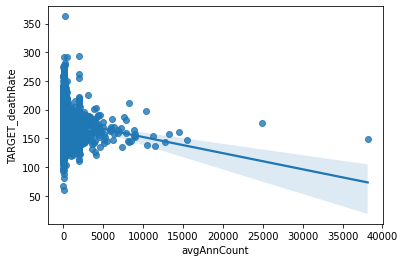

In [39]:
sns.regplot(x='avgAnnCount', y='TARGET_deathRate', data=df);

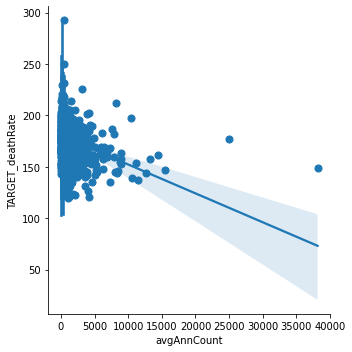

In [40]:
sns.lmplot(x='avgAnnCount', y='TARGET_deathRate', data=df, x_estimator=np.mean);

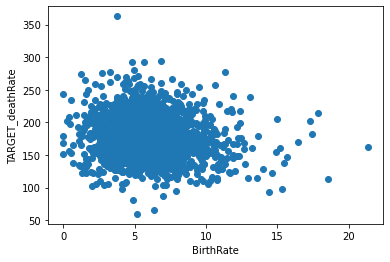

In [41]:
x1=df['BirthRate']
y1=df['TARGET_deathRate']
plt.xlabel('BirthRate',fontsize=10)
plt.ylabel('TARGET_deathRate',fontsize=10)
plt.scatter(x1,y1)
plt.show()

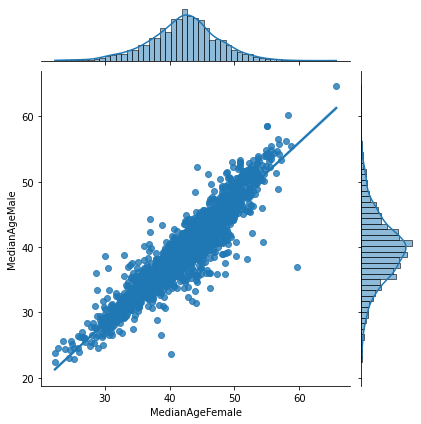

In [42]:
sns.jointplot(x='MedianAgeFemale',y='MedianAgeMale', data=df, kind="reg");

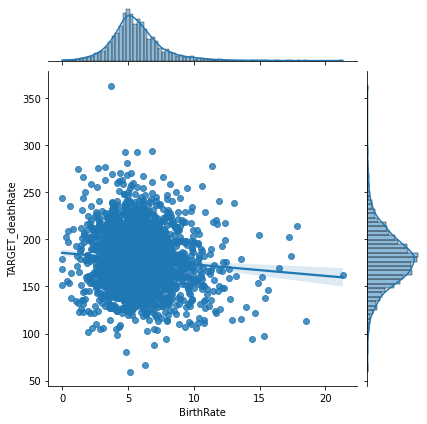

In [43]:
sns.jointplot(x='BirthRate', y='TARGET_deathRate', data=df, kind="reg");

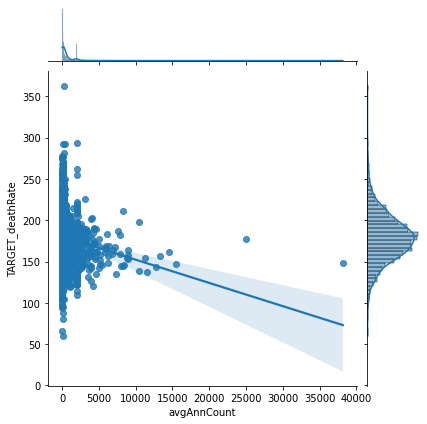

In [44]:
sns.jointplot(x='avgAnnCount', y='TARGET_deathRate', data=df, kind="reg");

C:\Users\Lenovo\anaconda3\envs\firstEnv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


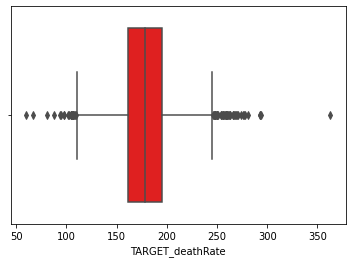

In [47]:
sns.boxplot(df.TARGET_deathRate,color='r')
plt.show()

C:\Users\Lenovo\anaconda3\envs\firstEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TARGET_deathRate', ylabel='Density'>

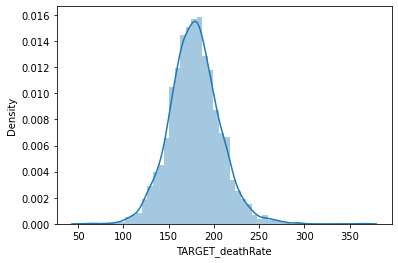

In [48]:
sns.distplot(df['TARGET_deathRate'])

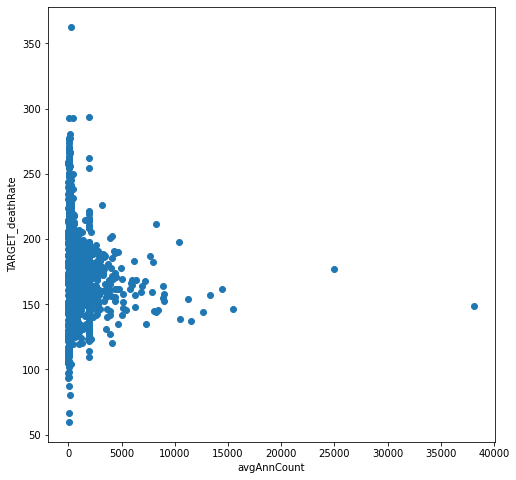

In [49]:
plt.figure(figsize=(8,8))
plt.xlabel('avgAnnCount')
plt.ylabel('TARGET_deathRate')
plt.scatter(x='avgAnnCount',y='TARGET_deathRate',data=df)
plt.show()

In [50]:
#Chi-square test
dataset_table=pd.crosstab(df['avgDeathsPerYear'],df['BirthRate'])
print(dataset_table)

BirthRate         0.000000   0.284091   0.363636   0.413223   0.476758   \
avgDeathsPerYear                                                          
3                         0          0          0          0          0   
4                         0          0          0          0          0   
5                         0          0          0          0          0   
6                         0          0          0          0          0   
7                         1          0          0          0          0   
...                     ...        ...        ...        ...        ...   
4895                      0          0          0          0          0   
5108                      0          0          0          0          0   
5780                      0          0          0          0          0   
9445                      0          0          0          0          0   
14010                     0          0          0          0          0   

BirthRate         0.5354

In [51]:
dataset_table.values

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [52]:
#Observed value
Observed_values=dataset_table.values
print("Observed values :-\n", Observed_values)

Observed values :-
 [[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [53]:
val=stats.chi2_contingency(dataset_table)

In [54]:
val

(1845896.7675531618,
 1.6607906948116016e-13,
 1831926,
 array([[0.00918937, 0.00229734, 0.00229734, ..., 0.00229734, 0.00229734,
         0.00229734],
        [0.03675747, 0.00918937, 0.00918937, ..., 0.00918937, 0.00918937,
         0.00918937],
        [0.0315064 , 0.0078766 , 0.0078766 , ..., 0.0078766 , 0.0078766 ,
         0.0078766 ],
        ...,
        [0.00131277, 0.00032819, 0.00032819, ..., 0.00032819, 0.00032819,
         0.00032819],
        [0.00131277, 0.00032819, 0.00032819, ..., 0.00032819, 0.00032819,
         0.00032819],
        [0.00131277, 0.00032819, 0.00032819, ..., 0.00032819, 0.00032819,
         0.00032819]]))

In [55]:
Expected_values=val[3]

In [56]:
Expected_values

array([[0.00918937, 0.00229734, 0.00229734, ..., 0.00229734, 0.00229734,
        0.00229734],
       [0.03675747, 0.00918937, 0.00918937, ..., 0.00918937, 0.00918937,
        0.00918937],
       [0.0315064 , 0.0078766 , 0.0078766 , ..., 0.0078766 , 0.0078766 ,
        0.0078766 ],
       ...,
       [0.00131277, 0.00032819, 0.00032819, ..., 0.00032819, 0.00032819,
        0.00032819],
       [0.00131277, 0.00032819, 0.00032819, ..., 0.00032819, 0.00032819,
        0.00032819],
       [0.00131277, 0.00032819, 0.00032819, ..., 0.00032819, 0.00032819,
        0.00032819]])

In [57]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,48.0,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


# Splitting of the data 

In [58]:
from typing import ValuesView
x=df.iloc[:,np.r_[0:2,3:31]].values
y=df.iloc[:,2].values

In [59]:
x

array([[1.39700000e+03, 4.69000000e+02, 4.89800000e+02, ...,
        1.84347853e+00, 5.28560759e+01, 6.11883103e+00],
       [1.73000000e+02, 7.00000000e+01, 4.11600000e+02, ...,
        3.74135153e+00, 4.53725004e+01, 4.33309558e+00],
       [1.02000000e+02, 5.00000000e+01, 3.49700000e+02, ...,
        2.74735831e+00, 5.44448684e+01, 3.72948782e+00],
       ...,
       [1.96266768e+03, 4.60000000e+01, 4.53549422e+02, ...,
        5.68070519e+00, 5.51539491e+01, 7.80919168e+00],
       [1.96266768e+03, 5.20000000e+01, 4.53549422e+02, ...,
        2.13179047e+00, 5.84842319e+01, 7.58293839e+00],
       [1.96266768e+03, 4.80000000e+01, 4.53549422e+02, ...,
        1.35645744e+00, 5.60402421e+01, 8.98172324e+00]])

In [60]:
y

array([164.9, 161.3, 174.7, ..., 153.9, 175. , 213.6])

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [62]:
print(x_train)

[[2.48000000e+02 1.18000000e+02 4.18200000e+02 ... 1.63030182e+00
  4.91734395e+01 5.34452297e+00]
 [2.63500000e+03 8.46000000e+02 4.36700000e+02 ... 1.77099778e+00
  5.06631014e+01 4.46565869e+00]
 [1.82000000e+02 8.10000000e+01 4.10400000e+02 ... 1.82529335e+00
  5.38166026e+01 4.54340304e+00]
 ...
 [1.83000000e+02 7.50000000e+01 4.56700000e+02 ... 8.57240830e-02
  5.90551181e+01 4.83615222e+00]
 [1.57000000e+02 6.40000000e+01 5.24100000e+02 ... 2.04057136e-01
  4.57334020e+01 4.00832900e+00]
 [2.70000000e+01 1.10000000e+01 4.75100000e+02 ... 2.12615167e-01
  3.63773966e+01 6.74460432e+00]]


In [63]:
print(y_train)

[195.8 141.7 179.1 ... 185.  205.  206.6]


In [64]:
np.any(np.isnan(df))

False

In [65]:
np.all(np.isfinite(df))

True

In [66]:
df = df.reset_index()

In [67]:
df.fillna(0)

,index,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,...,48.0,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


# Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [69]:
regressor.fit(x_train, y_train)

LinearRegression()

In [70]:
print(regressor.intercept_)

166.99646131143567


In [71]:
print(regressor.coef_)

[-3.19314044e-03  1.90776260e-02  1.90919006e-01  1.56529417e-04
 -1.93307453e-05  3.50656020e-01  5.39967979e-05 -4.61694790e-03
 -5.41405763e-01 -4.06463645e-02  6.40430279e-01  1.34422315e+00
 -1.10956937e-01  1.95343554e-01 -1.21499772e-01  4.50909581e-01
 -1.13258078e+00 -5.75552874e-01  1.51921697e-01 -5.04198481e-01
  1.30209262e-01  2.57155858e-01 -3.98909706e-01  4.81999544e-01
 -1.10395385e-01 -6.51811558e-02  1.02194468e-01 -9.27371462e-01
 -1.41702237e+00 -8.15013846e-01]


In [72]:
y_pred = regressor.predict(x_test)

In [73]:
print(y_pred)

[153.27276928 196.06686193 201.57536382 192.13368082 214.23622177
 160.95794698 178.14626937 153.65205754 203.6838286  177.13395108
 177.65844516 185.14879116 158.67381574 183.69207221 164.20940303
 160.1212181  127.49221855 224.40175858 156.42502601 170.24438968
 179.57107021 174.54799074 166.75671157 186.56549026 217.78598548
 126.68344645 204.80328103 163.19438856 189.80449891 187.96762513
 160.41179913 141.10587897 208.01332945 177.23220831 148.55644186
 197.81213532 158.15450387 156.67668011 179.35814035 157.65351808
 193.45787192 160.29260206 182.79616663 170.81012209 155.56610979
 192.54626535 188.47306069 190.6538236  171.95872896 162.02780448
 189.71644296 163.72840651 161.10640445 170.36057299 165.44331014
 174.12890252 192.73790878 199.00671794 203.01669763 180.02920257
 168.00047724 168.13791544 177.3420451  197.08244334 117.98937903
 193.50190531 179.45748381 197.90522483 210.28492651 143.02774774
 178.33442196 169.22842794 179.42357202 159.47213886 165.31149134
 182.86622

In [74]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5589216096657172

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [77]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [78]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 14.16
Mean squared error: 348.00
Root mean squared error: 18.65


In [79]:
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

Accuracy 91.68213848482719


# Random Forest

In [80]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train) 

RandomForestRegressor(n_estimators=10, random_state=0)

In [81]:
y_pred = regressor.predict(x_test)

In [82]:
print(y_pred)

[154.51 190.48 198.47 185.7  205.38 144.97 179.61 149.98 197.09 168.98
 169.66 182.44 157.13 184.89 172.54 166.69 117.93 229.64 163.13 167.16
 173.82 177.85 170.23 187.68 220.11 140.64 199.75 165.88 181.16 184.18
 167.25 126.15 204.97 189.89 148.05 188.23 147.22 158.44 189.53 183.29
 188.75 155.09 176.59 170.12 154.41 187.06 189.33 183.56 190.15 162.36
 182.95 172.99 160.22 179.89 163.82 183.49 177.29 200.01 177.98 169.07
 163.8  169.08 181.8  195.9  133.87 186.71 180.54 185.88 201.96 133.61
 170.6  176.07 178.65 180.57 157.33 188.51 162.54 147.03 172.   185.62
 191.89 186.62 200.86 169.   199.82 247.29 138.32 186.18 197.58 175.14
 174.57 161.7  156.25 216.2  159.37 148.88 170.12 199.98 190.55 173.53
 179.03 166.37 168.7  178.2  187.66 197.87 150.31 172.56 181.73 165.74
 197.32 195.16 199.73 194.94 186.33 162.07 181.79 165.9  160.56 169.38
 170.92 184.49 185.15 174.71 140.82 193.7  150.9  176.68 171.73 170.01
 167.91 151.93 161.81 189.77 171.36 203.57 159.18 155.81 186.   181.47
 212.1

In [98]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.09562466141787007

In [84]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [85]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 14.43
Mean squared error: 380.50
Root mean squared error: 19.51


In [99]:
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

Accuracy 88.51488277507097


# XGBOOST ALGO

In [86]:
pip install xgboost

In [101]:
#XGBoost Algo
import xgboost as xg

xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
 
# Fitting the model
xgb_r.fit(x_train, y_train)
 
# Predict the model
y_pred = xgb_r.predict(x_test)

[10:57:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [106]:
print(y_pred)

[147.34407  192.1666   200.2582   174.8899   214.68977  155.15053
 175.14137  155.20692  178.67429  169.93935  171.26335  188.91167
 158.69234  188.4267   166.43858  162.63115  123.93332  224.19258
 151.58817  166.11557  166.532    178.53688  168.22589  181.9716
 211.17749  127.32245  192.63487  164.77834  175.98894  174.26521
 161.7306   106.31578  187.54143  166.12828  142.58678  195.56845
 158.88031  154.23369  167.71999  179.38274  193.95654  137.37282
 169.51335  155.5824   146.08945  182.71863  177.73605  203.06407
 167.9679   161.62859  187.75415  173.31783  148.17332  150.99312
 137.04001  171.3899   178.85272  184.11981  163.5897   166.50294
 168.84279  160.96303  174.79784  190.5902   130.01103  192.312
 176.85297  183.62157  161.69131  123.5227   162.1531   156.74213
 183.92915  165.17348  133.67175  174.23672  163.91548  146.80557
 179.0848   162.87953  184.15823  185.95135  195.98822  150.20229
 189.42337  234.24638  126.11815  183.41284  197.50325  164.42422
 172.82689  1

In [102]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.49573294824358105

In [103]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [104]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 14.47
Mean squared error: 397.85
Root mean squared error: 19.95


In [105]:
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

Accuracy 91.84954643555429


# Pearson's Correlation test

In [107]:
df.head()

,index,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,...,48.0,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [110]:
from scipy.stats import pearsonr
list1 = df['BirthRate']
list2 = df['avgDeathsPerYear']
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.074


In [111]:
from scipy.stats import pearsonr
list1 = df['avgAnnCount']
list2 = df['avgDeathsPerYear']
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.939
